In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np
#한글 깨짐 방지용 코드
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [166]:
#asw 파일 수집
glob_aws = glob("./정제데이터/aws/*")
df_aws_list = []

for file in glob_aws:
    tmp = pd.read_excel(file)
    df_aws_list.append(tmp)
    
aws_raw = pd.concat(df_aws_list)

In [167]:
region_list = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '인천', '전남', '전북', '제주', '충남', '충북']

In [168]:
#인덱스 정렬
aws_raw.reset_index(drop=True, inplace=True) 

In [169]:
#지역별 월별 raw 파일 수집
df_month_list = []

for region in region_list:
    tmp = pd.read_excel(f'./data_raw/{region}/{region}_월별_raw.xlsx', index_col=0)
    df_month_list.append(tmp)

month_raw = pd.concat(df_month_list)

In [170]:
month_raw.reset_index(inplace=True, drop=True)

In [171]:
month_raw

,시도,구,연도,월별,발생건수,사망자수
0,강원,고성군,2018,1,7,0
1,강원,고성군,2018,2,7,1
2,강원,고성군,2018,3,6,0
3,강원,고성군,2018,4,8,2
4,강원,고성군,2018,5,11,0
...,...,...,...,...,...,...
13400,충북,괴산군,2022,8,24,1
13401,충북,괴산군,2022,9,17,2
13402,충북,괴산군,2022,10,21,0
13403,충북,괴산군,2022,11,9,2


In [172]:
# 시도별로 그룹화하여 월별 발생건수와 사망건수의 평균 계산
df_month = month_raw.groupby(['시도', '구'])[['발생건수', '사망자수']].sum()
df_month

발생건수  사망자수
시도 구               
강원 강릉시   4019    85
   고성군    667    22
   동해시   1682    24
   삼척시   1601    41
   속초시   2067    22
...       ...   ...
충북 제천시   3990    87
   증평군    901    15
   진천군   2479    66
   청주시  22661   297
   충주시   6012   137

[225 rows x 2 columns]

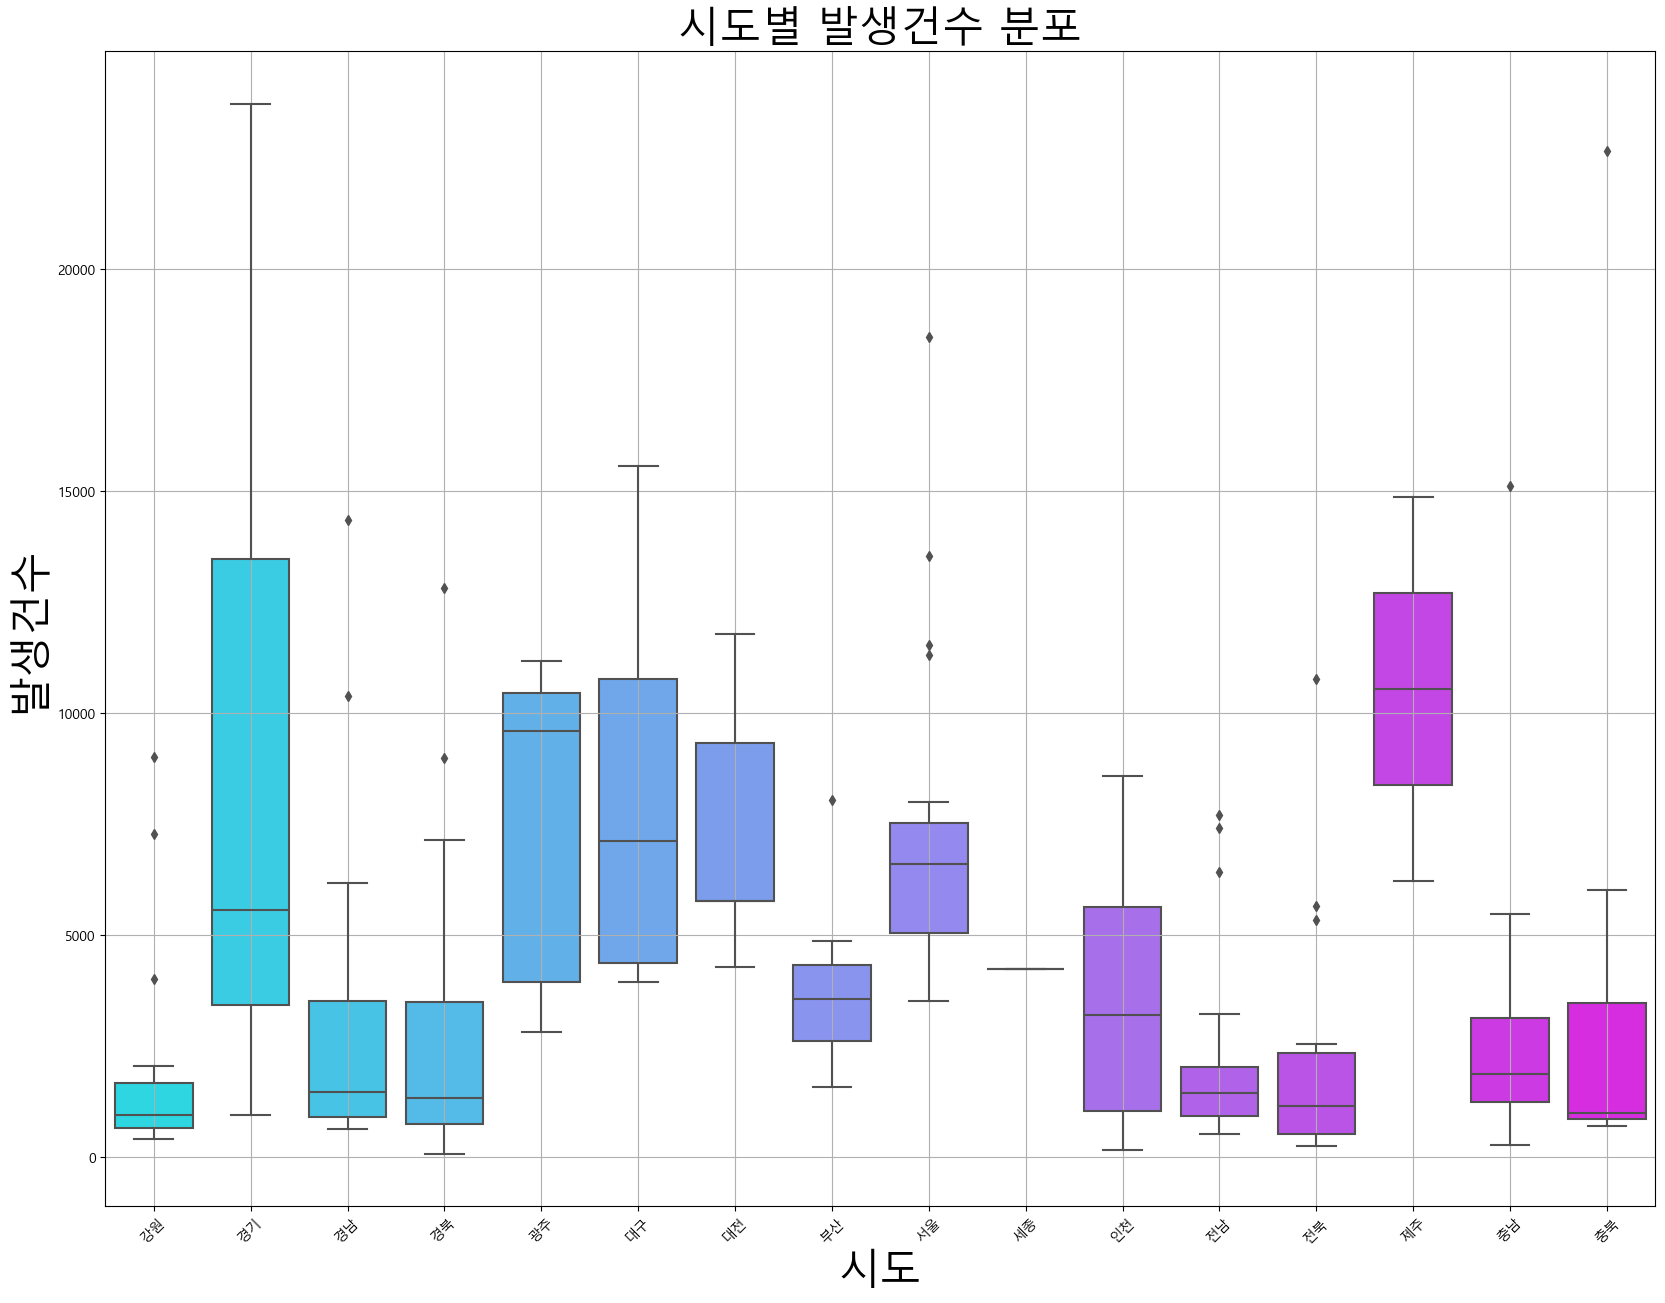

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시도별 발생건수에 대한 박스플롯 그리기
plt.figure(figsize=(20, 15))
sns.boxplot(x=df_month.index.get_level_values('시도'), y='발생건수', data=df_month, palette = 'cool')
plt.title('시도별 발생건수 분포', fontsize=30)
plt.xlabel('시도', fontsize=30)
plt.ylabel('발생건수', fontsize=30)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 월별 온도 데이터 정제

In [174]:
#온도 데이터
temp_raw_melt = aws_raw.melt(id_vars=['시도', '구', '연도'], value_vars=['1월_평균기온(°C)', '2월_평균기온(°C)','3월_평균기온(°C)', '4월_평균기온(°C)', '5월_평균기온(°C)', '6월_평균기온(°C)', '7월_평균기온(°C)', '8월_평균기온(°C)', '9월_평균기온(°C)', '10월_평균기온(°C)', '11월_평균기온(°C)', '12월_평균기온(°C)'],var_name=['월별'], value_name='평균기온(°C)')

In [175]:
temp_raw_melt['월별'] = temp_raw_melt['월별'].str.split('_').str[0].str.extract(r'(\d+)')

temp_raw_melt['월별']=temp_raw_melt['월별'].astype(int)

In [176]:
df_temp = temp_raw_melt.groupby(['시도','구', '월별'])[['평균기온(°C)']].mean()

In [177]:
df_temp.to_excel('./melt예.xlsx')

In [178]:
df_temp

평균기온(°C)
시도 구   월별          
강원 강릉시 1      -1.06
       2       0.58
       3       6.34
       4      10.80
       5      16.00
...             ...
충북 충주시 8      24.98
       9      19.38
       10     11.70
       11      5.66
       12     -2.72

[2736 rows x 1 columns]

#### 월별 풍속 데이터 정제

In [179]:
#온도 데이터
wind_raw_melt = aws_raw.melt(id_vars=['시도', '구', '연도'], value_vars=['1월_평균풍속(m/s)', '2월_평균풍속(m/s)', '3월_평균풍속(m/s)', '4월_평균풍속(m/s)', '5월_평균풍속(m/s)', '6월_평균풍속(m/s)', '7월_평균풍속(m/s)', '8월_평균풍속(m/s)', '9월_평균풍속(m/s)', '10월_평균풍속(m/s)', '11월_평균풍속(m/s)', '12월_평균풍속(m/s)'],var_name=['월별'], value_name='평균풍속(m/s)')

In [180]:
wind_raw_melt['월별'] = wind_raw_melt['월별'].str.split('_').str[0].str.extract(r'(\d+)')

wind_raw_melt['월별']=wind_raw_melt['월별'].astype(int)

In [181]:
df_wind = wind_raw_melt.groupby(['시도','구', '월별'])[['평균풍속(m/s)']].mean()

In [182]:
df_wind

평균풍속(m/s)
시도 구   월별           
강원 강릉시 1        2.36
       2        2.50
       3        2.40
       4        2.52
       5        2.32
...              ...
충북 충주시 8        1.26
       9        1.34
       10       1.16
       11       1.24
       12       1.38

[2736 rows x 1 columns]

#### 월별 강수량 데이터 정제

In [183]:
#온도 데이터
rain_raw_melt = aws_raw.melt(id_vars=['시도', '구', '연도'], value_vars=['1월_총_강수량(mm)', '2월_총_강수량(mm)', '3월_총_강수량(mm)', '4월_총_강수량(mm)', '5월_총_강수량(mm)', '6월_총_강수량(mm)', '7월_총_강수량(mm)', '8월_총_강수량(mm)', '9월_총_강수량(mm)', '10월_총_강수량(mm)', '11월_총_강수량(mm)', '12월_총_강수량(mm)'],var_name=['월별'], value_name='총_강수량(mm)')

In [184]:
rain_raw_melt['월별'] = rain_raw_melt['월별'].str.split('_').str[0].str.extract(r'(\d+)')

rain_raw_melt['월별']=rain_raw_melt['월별'].astype(int)

In [185]:
#mean
df_rain = rain_raw_melt.groupby(['시도','구', '월별'])[['총_강수량(mm)']].mean()

In [186]:
df_rain

총_강수량(mm)
시도 구   월별           
강원 강릉시 1       176.4
       2       146.5
       3       462.0
       4       538.0
       5       486.5
...              ...
충북 충주시 8      1004.1
       9       478.4
       10      166.2
       11      172.4
       12       41.6

[2736 rows x 1 columns]

#### 월별 발생건수 데이터 정제

In [187]:
#월별 
occur_raw_melt = aws_raw.melt(id_vars=['시도', '구', '연도'], value_vars=["발생_01", "발생_02", "발생_03", "발생_04", "발생_05", "발생_06", "발생_07", "발생_08", "발생_09", "발생_10", "발생_11", "발생_12"]
,var_name=['월별'], value_name='발생건수')

In [188]:
occur_raw_melt['월별'] = occur_raw_melt['월별'].str.split('_').str[1]

occur_raw_melt['월별']=occur_raw_melt['월별'].astype(int)

In [189]:
df_occur = occur_raw_melt.groupby(['시도','구', '월별'])[['발생건수']].sum()

In [190]:
df_occur

발생건수
시도 구   월별      
강원 강릉시 1    326
       2    296
       3    325
       4    327
       5    333
...         ...
충북 충주시 8    464
       9    590
       10   594
       11   565
       12   454

[2736 rows x 1 columns]

#### 월별 사망건수 데이터 정제

In [191]:
#월별 
death_raw_melt = aws_raw.melt(id_vars=['시도', '구', '연도'], value_vars=["사망_01", "사망_02", "사망_03", "사망_04", "사망_05", "사망_06", "사망_07", "사망_08", "사망_09", "사망_10", "사망_11", "사망_12"]
,var_name=['월별'], value_name='사망자수')

In [192]:
death_raw_melt['월별'] = death_raw_melt['월별'].str.split('_').str[1]

death_raw_melt['월별']=death_raw_melt['월별'].astype(int)

In [193]:
df_death = death_raw_melt.groupby(['시도','구', '월별'])[['사망자수']].sum()

In [194]:
df_death

사망자수
시도 구   월별      
강원 강릉시 1      6
       2      3
       3      7
       4      9
       5      5
...         ...
충북 충주시 8      8
       9     15
       10     9
       11    18
       12     9

[2736 rows x 1 columns]

## 정제한 데이터를 한곳에 묶자 : df_final

In [195]:
#최종적으로 만들고자 하는 데이터프레임 : df_final
# 평균기온(°C), 평균풍속(m/s), 총_강수량(mm), 발생건수, 사망자수
df_final = df_temp.copy() #df_temp, df_wind, df_rain, df_occur, df_death

In [196]:
df_final['평균풍속(m/s)'] = df_wind['평균풍속(m/s)']
df_final['총_강수량(mm)'] = df_rain['총_강수량(mm)']
df_final['발생건수'] = df_occur['발생건수']
df_final['사망자수'] = df_death['사망자수']

In [197]:
df_final.corr()

,평균기온(°C),평균풍속(m/s),총_강수량(mm),발생건수,사망자수
평균기온(°C),1.000000,0.091331,0.324276,0.072184,0.051243
평균풍속(m/s),0.091331,1.000000,-0.063531,0.022138,-0.043675
총_강수량(mm),0.324276,-0.063531,1.000000,0.025428,0.126208
발생건수,0.072184,0.022138,0.025428,1.000000,0.595676
사망자수,0.051243,-0.043675,0.126208,0.595676,1.000000


In [198]:
df_final.columns

Index(['평균기온(°C)', '평균풍속(m/s)', '총_강수량(mm)', '발생건수', '사망자수'], dtype='object')

In [199]:
# target_col = ['평균기온(°C)', '평균풍속(m/s)', '총_강수량(mm)']

# crime_anal_norm['발생건수'] = crime_anal_norm['발생건수']/12 #5개로 나눈 이유 : 강간,강도,살인,절도,폭력의 평균이라서
# crime_anal_norm_sort = crime_anal_norm.sort_values(by = '범죄', ascending=False)

# plt.figure(figsize=(10,10))
# sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu') #annot 숫자표시 
# plt.title('범죄 비율(정규화된 발생 건수로 정렬)')
# plt.show()

C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

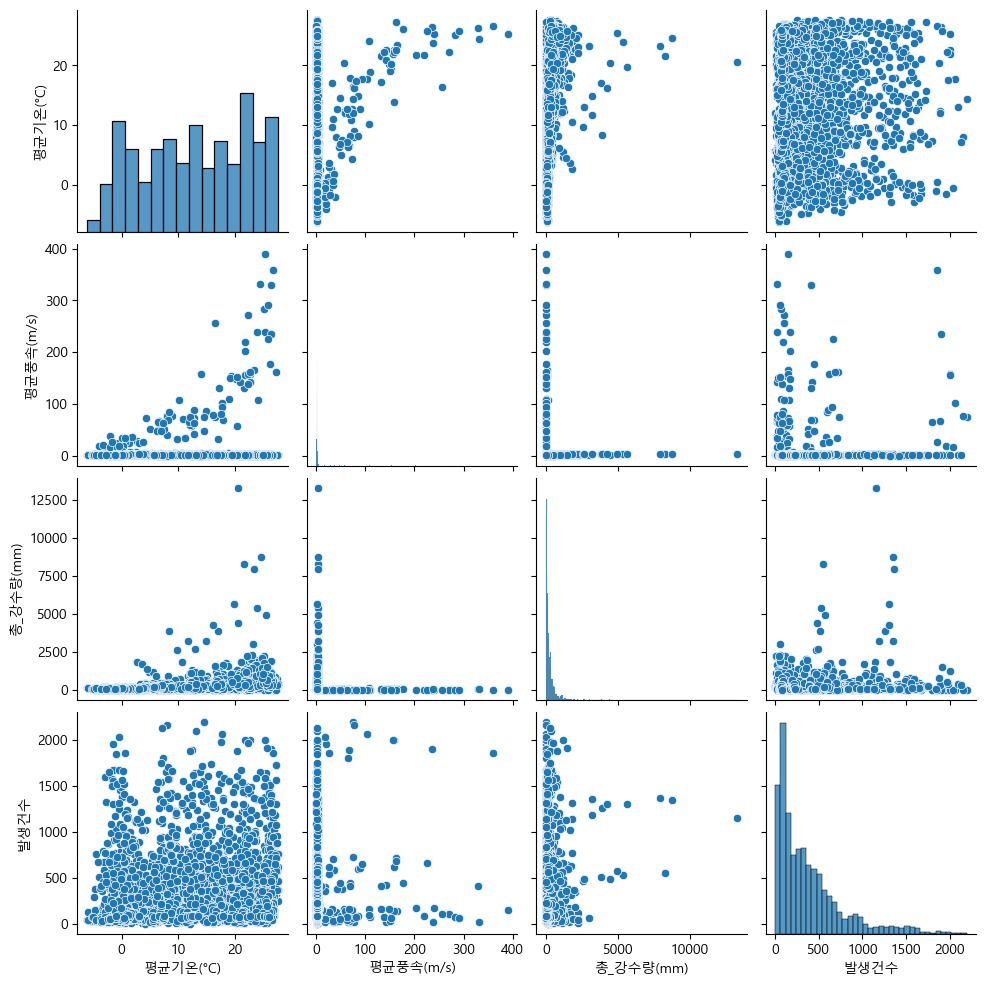

In [200]:
# 상관관계 계산
correlation_matrix = df_final[['평균기온(°C)', '평균풍속(m/s)', '총_강수량(mm)', '발생건수']].corr()

# 산점도 행렬 그리기
sns.pairplot(df_final[['평균기온(°C)', '평균풍속(m/s)', '총_강수량(mm)', '발생건수']])
plt.show()

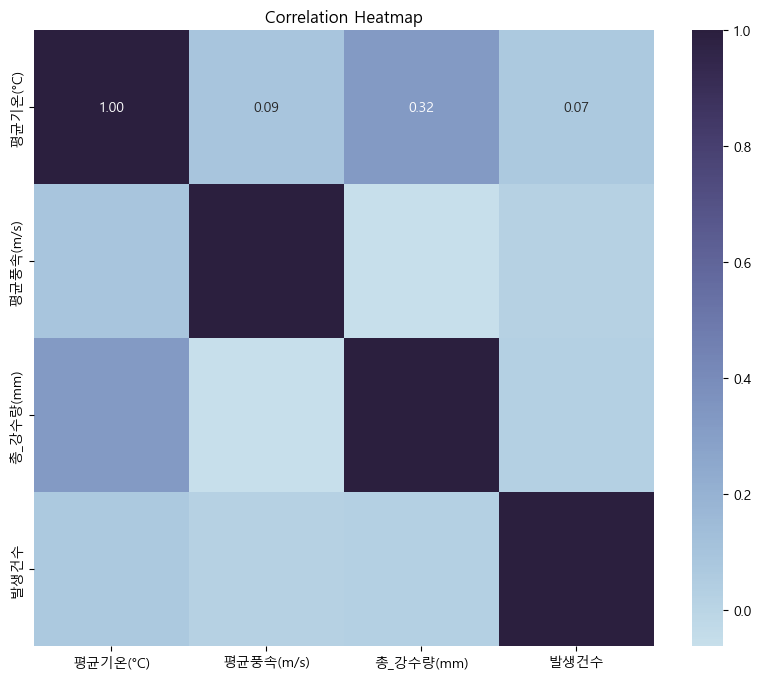

In [201]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True), fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [202]:
df_final

평균기온(°C)  평균풍속(m/s)  총_강수량(mm)  발생건수  사망자수
시도 구   월별                                            
강원 강릉시 1      -1.06       2.36      176.4   326     6
       2       0.58       2.50      146.5   296     3
       3       6.34       2.40      462.0   325     7
       4      10.80       2.52      538.0   327     9
       5      16.00       2.32      486.5   333     5
...             ...        ...        ...   ...   ...
충북 충주시 8      24.98       1.26     1004.1   464     8
       9      19.38       1.34      478.4   590    15
       10     11.70       1.16      166.2   594     9
       11      5.66       1.24      172.4   565    18
       12     -2.72       1.38       41.6   454     9

[2736 rows x 5 columns]

## 시도 까지만 묶어보자(멀티인덱스 : 시도 월별)

In [203]:
df_final

평균기온(°C)  평균풍속(m/s)  총_강수량(mm)  발생건수  사망자수
시도 구   월별                                            
강원 강릉시 1      -1.06       2.36      176.4   326     6
       2       0.58       2.50      146.5   296     3
       3       6.34       2.40      462.0   325     7
       4      10.80       2.52      538.0   327     9
       5      16.00       2.32      486.5   333     5
...             ...        ...        ...   ...   ...
충북 충주시 8      24.98       1.26     1004.1   464     8
       9      19.38       1.34      478.4   590    15
       10     11.70       1.16      166.2   594     9
       11      5.66       1.24      172.4   565    18
       12     -2.72       1.38       41.6   454     9

[2736 rows x 5 columns]

In [204]:
# '구'를 컬럼으로 이동하여 멀티 인덱스로 변경
df_sido_temp = temp_raw_melt.groupby(['시도', '월별'])[['평균기온(°C)']].mean()
df_sido_wind = wind_raw_melt.groupby(['시도', '월별'])[['평균풍속(m/s)']].mean()
df_sido_rain = rain_raw_melt.groupby(['시도', '월별'])[['총_강수량(mm)']].mean()
df_sido_occur = occur_raw_melt.groupby(['시도', '월별'])[['발생건수']].mean()
df_sido_death = death_raw_melt.groupby(['시도', '월별'])[['사망자수']].mean()

In [205]:
df_sido = df_sido_temp.copy()
df_sido['평균풍속(m/s)'] = df_sido_wind['평균풍속(m/s)']
df_sido['총_강수량(mm)'] = df_sido_rain['총_강수량(mm)']
df_sido['발생건수'] = df_sido_occur['발생건수']
df_sido['사망자수'] = df_sido_death['사망자수']

In [206]:
df_sido

평균기온(°C)  평균풍속(m/s)   총_강수량(mm)       발생건수      사망자수
시도 월별                                                       
강원 1   -3.584444   4.206667   89.084444  29.822222  0.700000
   2   -1.353333   4.553333   96.778889  25.055556  0.411111
   3    5.264444   8.132222  261.932222  27.655556  0.644444
   4   10.182222   9.465556  307.185556  30.466667  0.677778
   5   15.612222   8.413333  441.995556  33.877778  0.688889
...          ...        ...         ...        ...       ...
충북 8   25.247273   1.172727  745.936364  67.363636  1.490909
   9   19.816364   1.232727  380.058182  69.163636  1.472727
   10  12.389091   1.078182  160.523636  73.927273  1.654545
   11   6.412727   1.130909  133.710909  73.109091  1.381818
   12  -1.769091   1.258182   33.170909  61.527273  1.272727

[204 rows x 5 columns]

C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

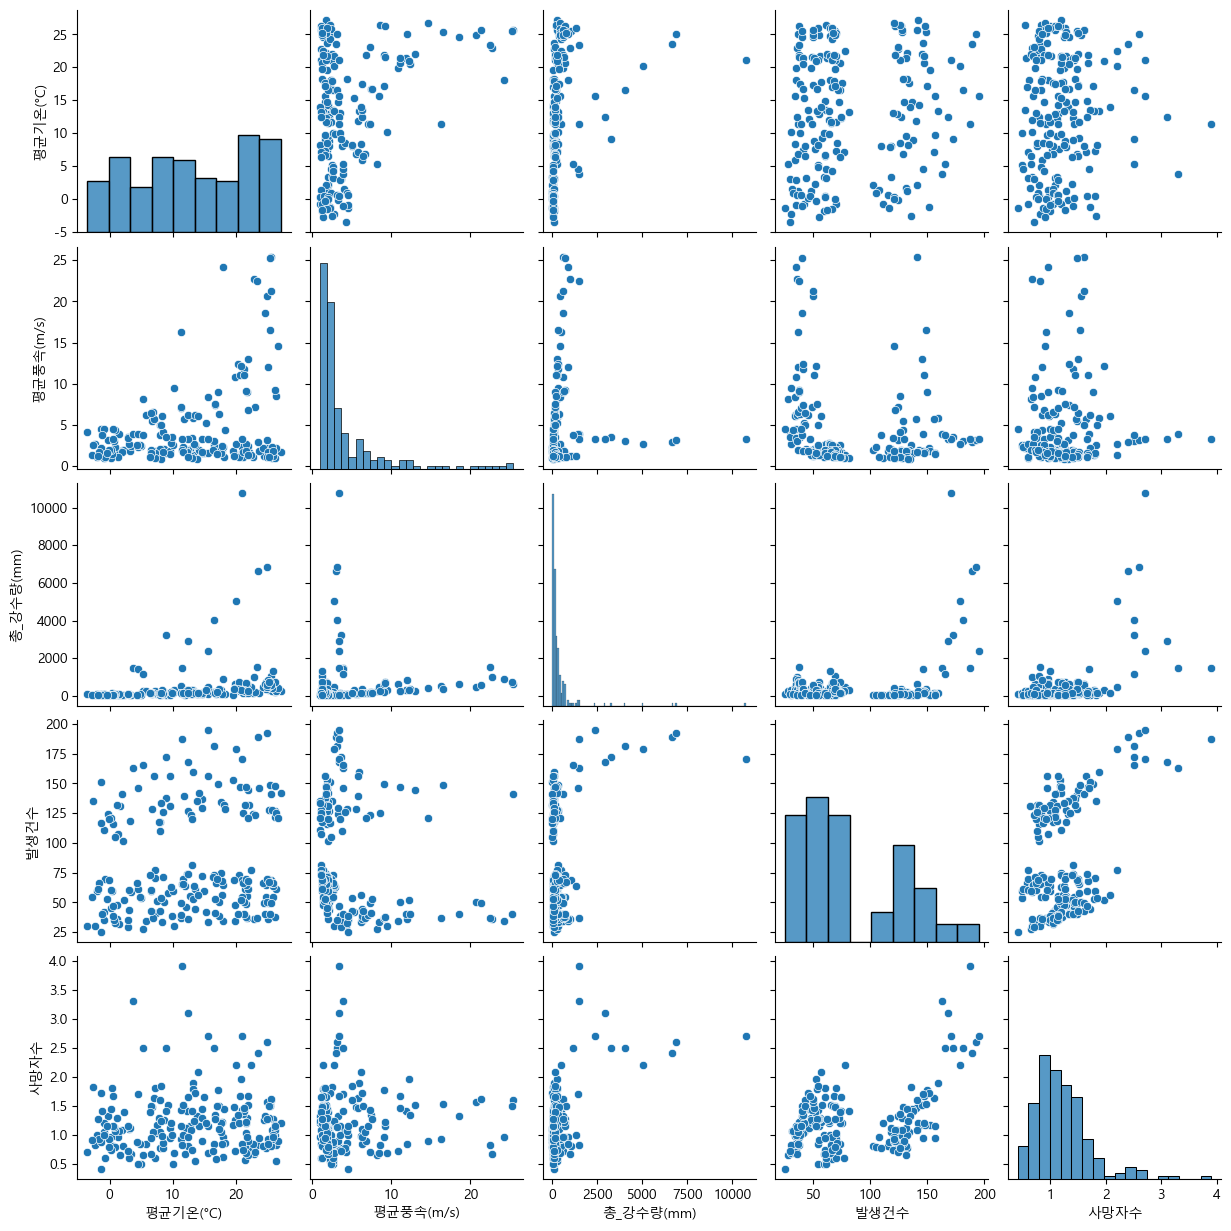

In [207]:
# 상관관계 계산
correlation_matrix_sido = df_sido.corr()

# 산점도 행렬 그리기
sns.pairplot(df_sido)
plt.show()

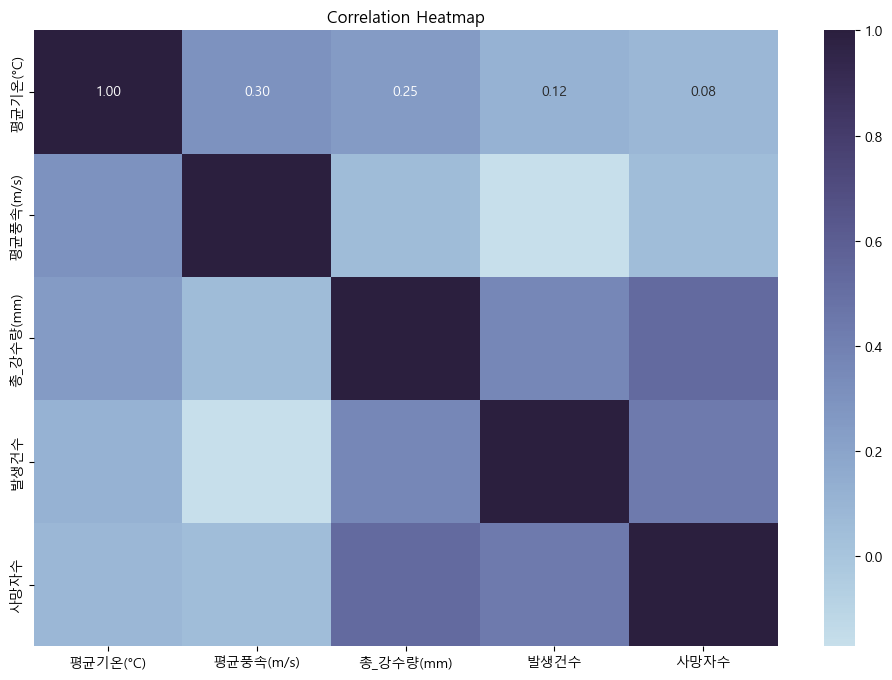

In [208]:
# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_sido, annot=True, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True), fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 서울 지역만 x

In [209]:
df_seoul = df_final.loc['서울']
df_seoul

평균기온(°C)  평균풍속(m/s)  총_강수량(mm)  발생건수  사망자수
구   월별                                            
강남구 1      -0.72       1.40       18.1  1526     7
    2       1.50       1.62       22.3  1355     7
    3       8.56       1.58       59.8  1366     9
    4      13.66       1.62       70.5  1521     6
    5      18.94       1.48      109.9  1557     6
...          ...        ...        ...   ...   ...
중랑구 8      27.22       2.02      333.6   579     3
    9      22.46       2.12      147.6   630     5
    10     15.36       1.78       74.6   690     1
    11      9.10       1.64       78.3   678     7
    12      0.44       1.74       10.2   574     2

[300 rows x 5 columns]

C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

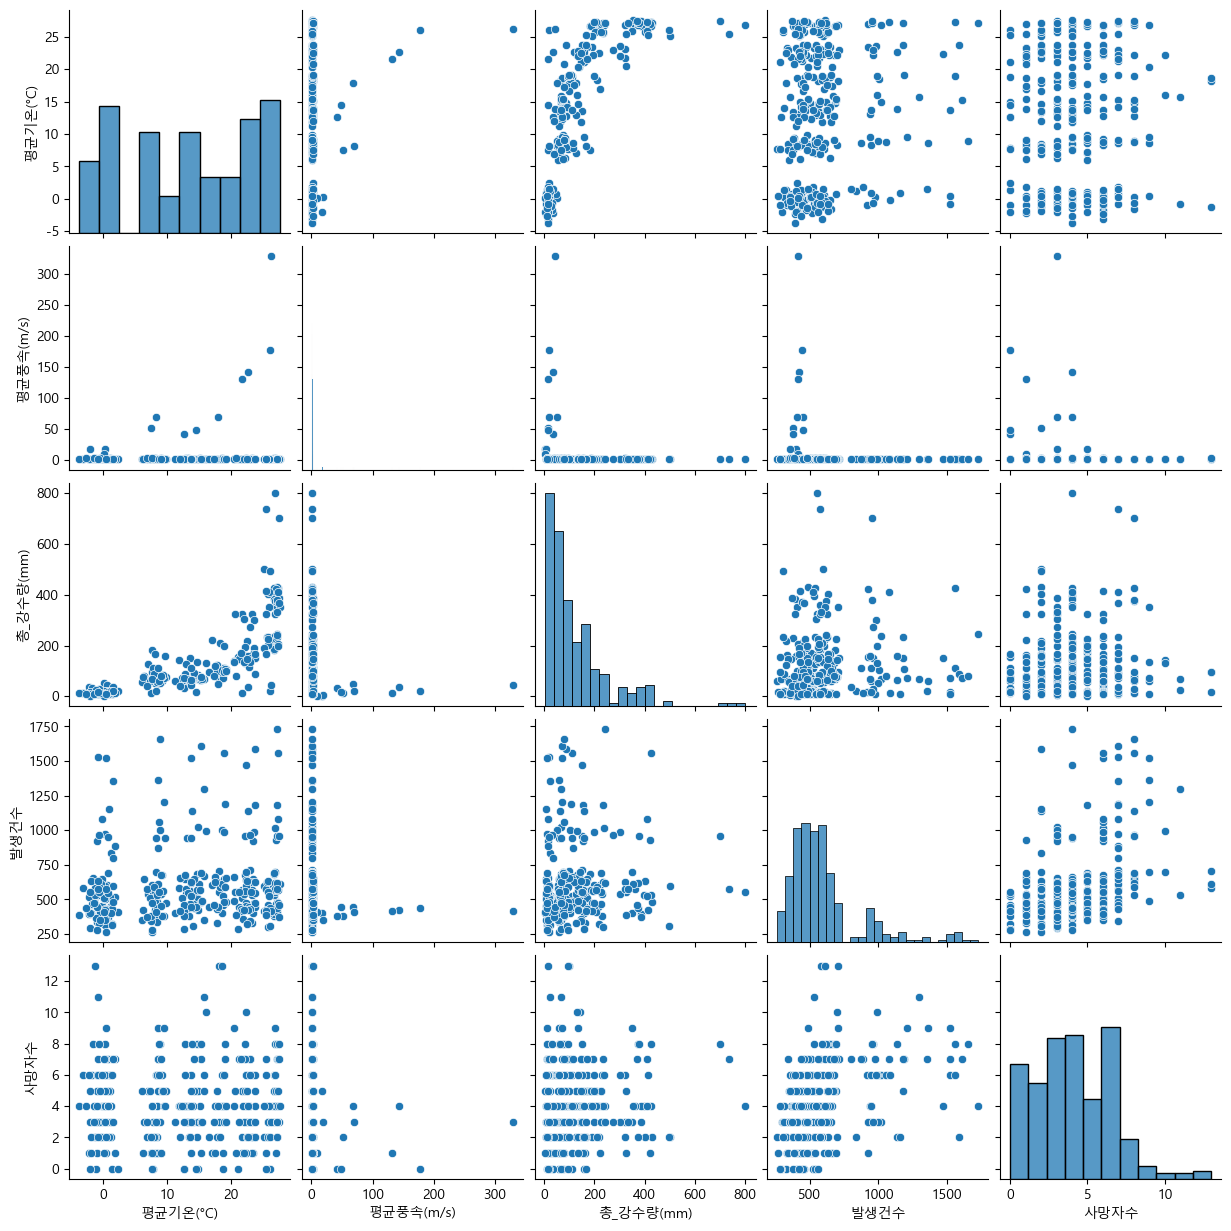

In [210]:
# 상관관계 계산
correlation_matrix_seoul = df_seoul.corr()

# 산점도 행렬 그리기
sns.pairplot(df_seoul)
plt.show()

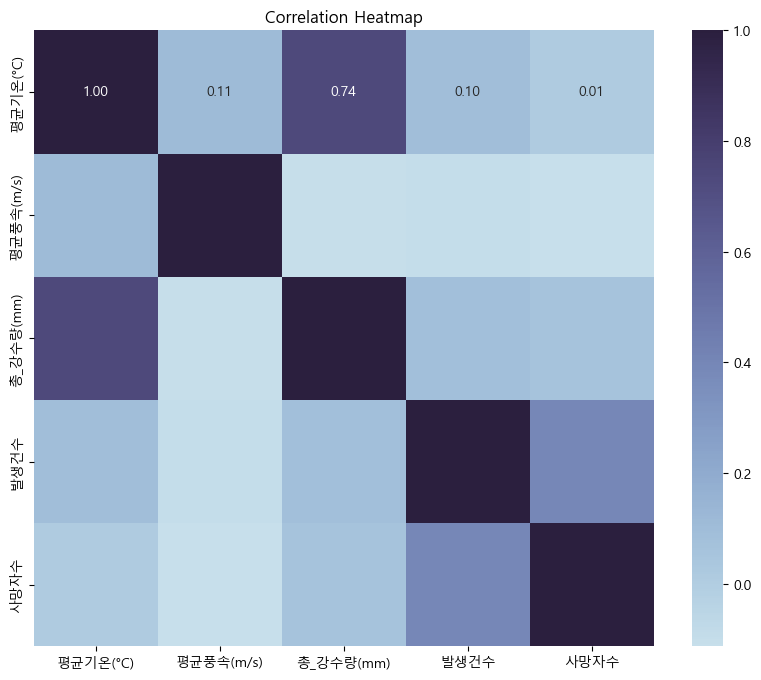

In [220]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_seoul, annot=True, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True), fmt=".2f") #RdBu, Set1
plt.title('Correlation Heatmap')
plt.show()

## 전국 

In [212]:
# '구'를 컬럼으로 이동하여 멀티 인덱스로 변경
df_wide_temp = temp_raw_melt.groupby(['월별'])[['평균기온(°C)']].mean()
df_wide_wind = wind_raw_melt.groupby(['월별'])[['평균풍속(m/s)']].mean()
df_wide_rain = rain_raw_melt.groupby(['월별'])[['총_강수량(mm)']].mean()
df_wide_occur = occur_raw_melt.groupby(['월별'])[['발생건수']].mean()
df_wide_death = death_raw_melt.groupby(['월별'])[['사망자수']].mean()

In [213]:
df_wide = df_wide_temp.copy()
df_wide['평균풍속(m/s)'] = df_wide_wind['평균풍속(m/s)']
df_wide['총_강수량(mm)'] = df_wide_rain['총_강수량(mm)']
df_wide['발생건수'] = df_wide_occur['발생건수']
df_wide['사망자수'] = df_wide_death['사망자수']

In [214]:
df_wide

,평균기온(°C),평균풍속(m/s),총_강수량(mm),발생건수,사망자수
월별,,,,,
1,-0.602719,2.697632,66.416316,71.064912,1.111404
2,1.373421,2.900614,69.259781,64.769298,0.930702
3,7.583421,4.163333,181.652456,70.200000,1.044737
4,12.193860,4.368772,187.804737,76.171930,1.077193
5,17.349737,4.810088,229.149123,81.310526,1.188596
6,21.749825,6.534298,364.870439,78.757018,1.098246
7,25.025439,9.403070,574.219825,79.803509,1.128947
8,25.758772,11.448070,688.710132,77.650000,1.221930
9,20.828684,7.408158,473.232807,78.692105,1.257018


C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Playdata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

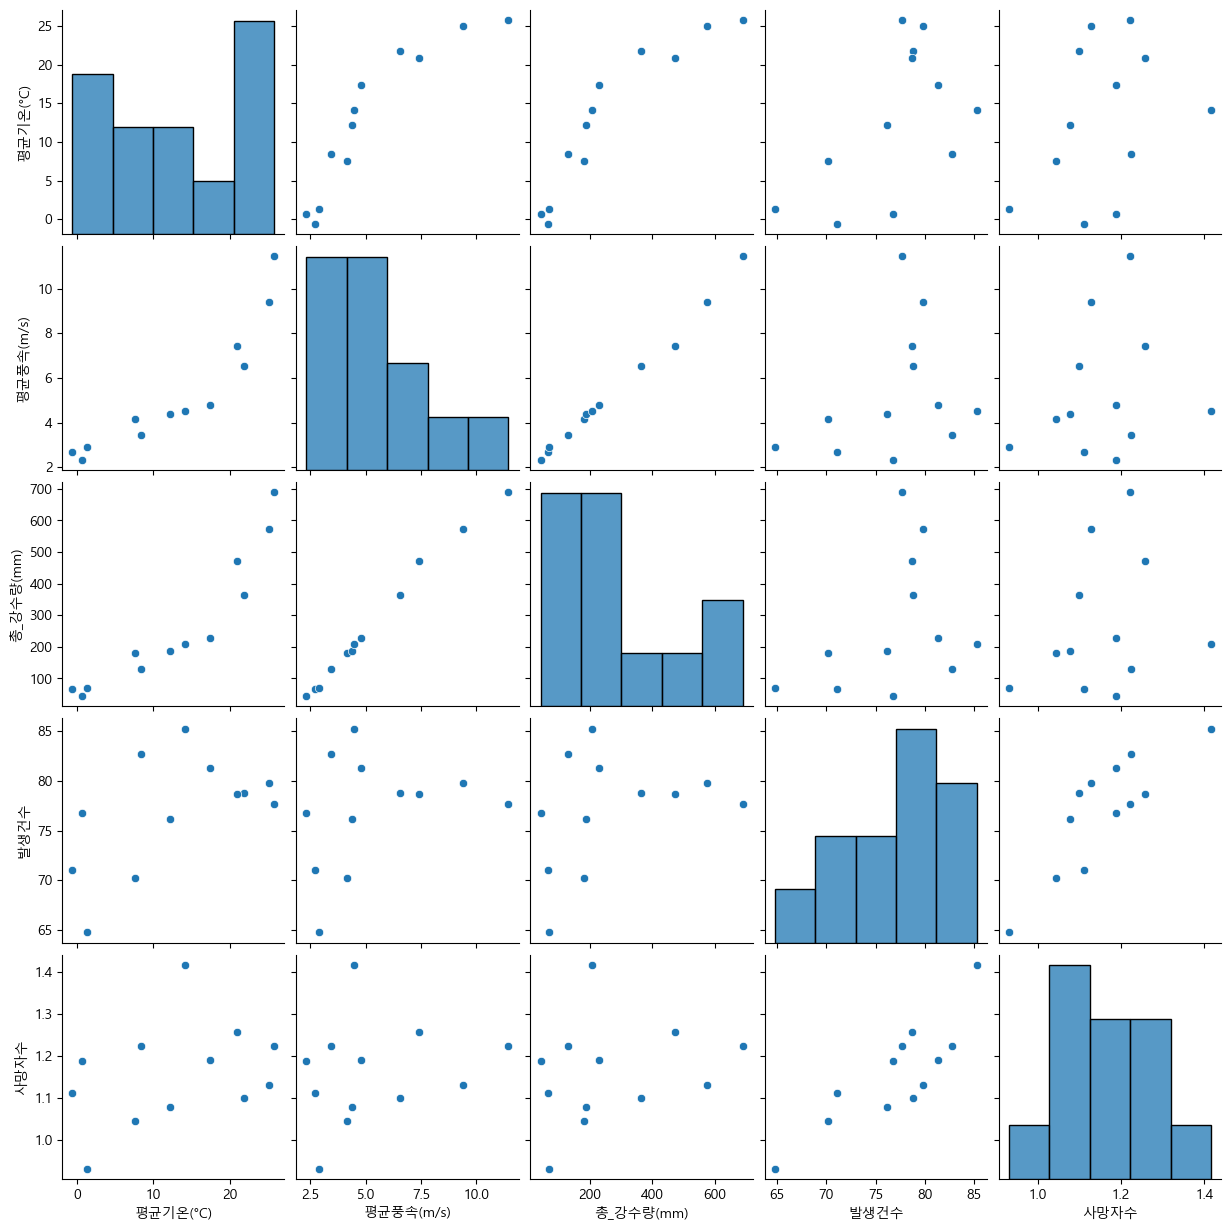

In [215]:
# 상관관계 계산
correlation_matrix_wide = df_wide.corr()

# 산점도 행렬 그리기
sns.pairplot(df_wide)
plt.show()

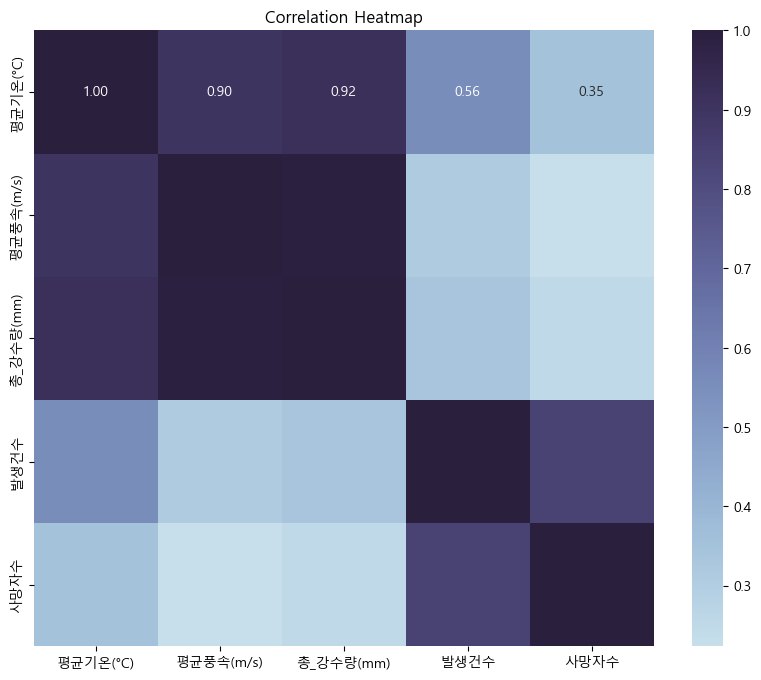

In [216]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix_wide, annot=True, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True), fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [217]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 스케일링할 열 선택
columns_to_scale = ['평균기온(°C)', '평균풍속(m/s)', '총_강수량(mm)','발생건수','사망자수']  # 스케일링할 열 이름으로 바꿔주세요

# 선택한 열 스케일링
df_wide_scaled = df_wide.copy()  # 원본 DataFrame 복사
df_wide_scaled[columns_to_scale] = scaler.fit_transform(df_wide_scaled[columns_to_scale])

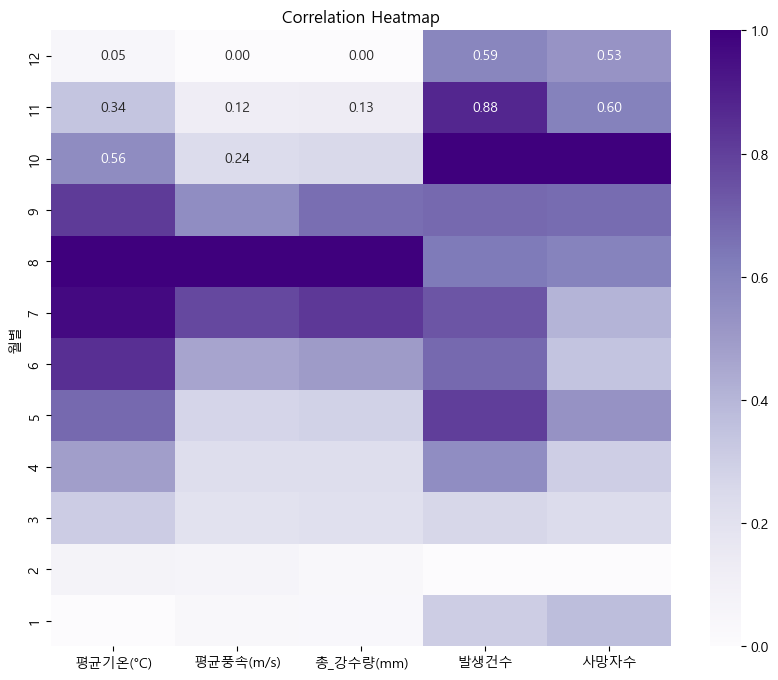

In [218]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
df_wide_scaled_sort = df_wide_scaled.sort_values(by = '월별' , ascending=False)

sns.heatmap(df_wide_scaled_sort, cmap='Purples', annot=True, fmt=".2f",)
plt.title('Correlation Heatmap')
plt.show()

In [219]:
df_wide

,평균기온(°C),평균풍속(m/s),총_강수량(mm),발생건수,사망자수
월별,,,,,
1,-0.602719,2.697632,66.416316,71.064912,1.111404
2,1.373421,2.900614,69.259781,64.769298,0.930702
3,7.583421,4.163333,181.652456,70.200000,1.044737
4,12.193860,4.368772,187.804737,76.171930,1.077193
5,17.349737,4.810088,229.149123,81.310526,1.188596
6,21.749825,6.534298,364.870439,78.757018,1.098246
7,25.025439,9.403070,574.219825,79.803509,1.128947
8,25.758772,11.448070,688.710132,77.650000,1.221930
9,20.828684,7.408158,473.232807,78.692105,1.257018
